In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import openslide
import matplotlib.patches as patches

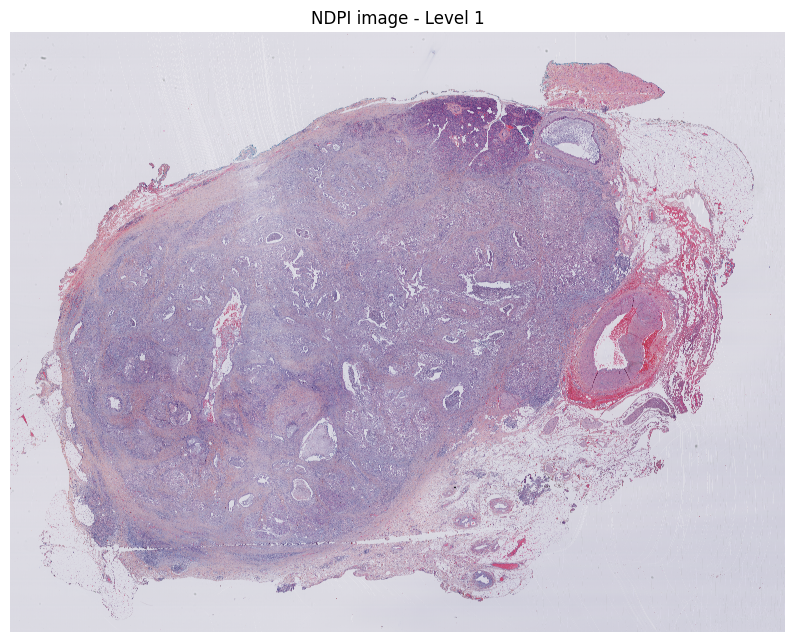

In [3]:
file_path = '/home/matthieu.bernard/Documents/IF_to_IMC/data/raw/he_data/15T011146-16 HE - 2022-06-09 13.57.ndpi'

slide = openslide.OpenSlide(file_path)

level = 1 # use a lower level to avoid memory issues
dims = slide.level_dimensions[level]

# Read the image region at the selected level
img = slide.read_region((0, 0), level, dims)

# Convert to RGB (removes alpha)
img_rgb = img.convert("RGB")

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"NDPI image - Level {level}")
plt.show()

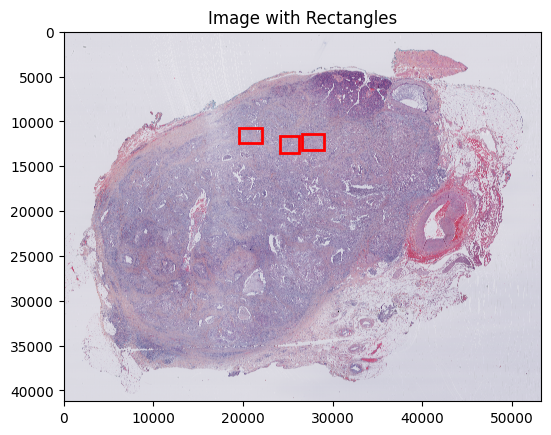

In [4]:
rois = [
    (19537, 10755, 2589, 1612),
    (24079, 11590, 2147, 1906),
    (26589, 11433, 2407, 1757)
]

fig, ax = plt.subplots()
ax.imshow(img_rgb, cmap='gray')

# Add rectangles
for (x, y, w, h) in rois:
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

plt.title("Image with Rectangles")
plt.show()